## Création de visualisations graphiques

<h3> Premier graphique: </h3>

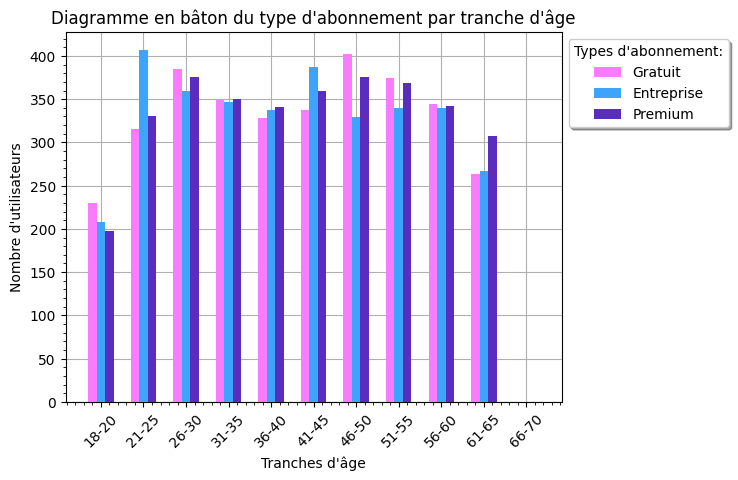

In [ ]:
from matplotlib.pyplot import *
from pandas import *

#lecture du fichier excel
df = read_excel("dataS204.xlsx")

#tableau contenant les categories d'ages observees
categories = ['18-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70']

#dictionnaire comprenant comme clés les type d'abonnement possibles et comme valeurs des dictionnaire avec leur nombre par tranche d'age
data = {
    "Premium": dict.fromkeys(categories, 0),
    "Entreprise": dict.fromkeys(categories, 0),
    "Gratuit": dict.fromkeys(categories, 0)
}

#boucle sur le nombre de lignes
for i in df.index:
    type_abonnement = df[" J (Type d'abonnement) "][i]
    age = int(df[" G (Âge) "][i])

    if 18 <= age <= 20:
        data[type_abonnement]['18-20'] += 1
    elif 21 <= age <= 25:
        data[type_abonnement]['21-25'] += 1
    elif 26 <= age <= 30:
        data[type_abonnement]['26-30'] += 1
    elif 31 <= age <= 35:
        data[type_abonnement]['31-35'] += 1
    elif 36 <= age <= 40:
        data[type_abonnement]['36-40'] += 1
    elif 41 <= age <= 45:
        data[type_abonnement]['41-45'] += 1
    elif 46 <= age <= 50:
        data[type_abonnement]['46-50'] += 1
    elif 51 <= age <= 55:
        data[type_abonnement]['51-55'] += 1
    elif 56 <= age <= 60:
        data[type_abonnement]['56-60'] += 1
    elif 61 <= age <= 65:
        data[type_abonnement]['61-65'] += 1
    elif 66 <= age <= 70:
        data[type_abonnement]['66-70'] += 1

barWidth = 0.2 #epaisseur d'une colonne

#initialisation d'un tableau par type d'abonnement contenant les valeurs pour chaque categorie d'age
g = list(data['Gratuit'].values())
e = list(data['Entreprise'].values())
p = list(data['Premium'].values())

#initialisation de tableau permettant de placer les colones cotes a cotes pour chaque categories
r1 = range(len(g))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

#creation des diagrammes en batons (qui seront rassemblé en un seul au final)
bar(r1, g, width=barWidth, color='#f97bff', label='Gratuit', zorder=3)
bar(r2, e, width=barWidth, color='#3ca4fb', label='Entreprise', zorder=3)
bar(r3, p, width=barWidth, color='#592dc0', label='Premium', zorder=3)

#legendes pour chaque colonne
xticks([r + barWidth for r in range(len(g))], categories, rotation=45)

#legendes pour le graphique
xlabel("Tranches d'âge")
ylabel("Nombre d'utilisateurs")
title("Diagramme en bâton du type d'abonnement par tranche d'âge")
legend(shadow = True, bbox_to_anchor = (1, 1), title = "Types d'abonnement:")

#parametres de la grille
minorticks_on()
grid(True)

#affichage
show()


<h3>Deuxième graphique:</h3>

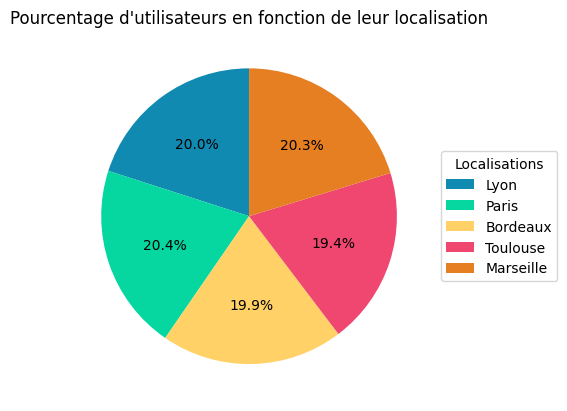

In [30]:
from matplotlib.pyplot import *
from pandas import *

#lecture du fichier excel
df = read_excel("dataS204.xlsx")

# initialisation d'un dico ayant comme clés les localisations possibles et comme valeurs leur nombre d'occurence
loc = {}
for e in df[' H (Localisation) ']:
    if e not in loc:
        loc[e] = 1
    else:
        loc[e] += 1

# donnees pour le diagramme circulaire
x = list(loc)
y = list(loc.values())

# tableau de couleurs pour les differentes localisation
couleurs = ["#118AB2", "#06D6A0", "#FFD166", "#EF476F", "#E67E22"]

# creation du graphique
pie(y, autopct='%1.1f%%', startangle=90, colors=couleurs)

#  creation des legendes et titre
legend(x, title="Localisations", loc="center left", bbox_to_anchor=(1, 0.5))
title("Pourcentage d'utilisateurs en fonction de leur localisation")

#affichage
show()


<h3>Troisième graphique:</h3>

moyenne d'engagement estimés = 5759.84
moyenne de likes en fonction des partages = 5251.26
covariance = 8368610.37
coef de pearson = 1.0


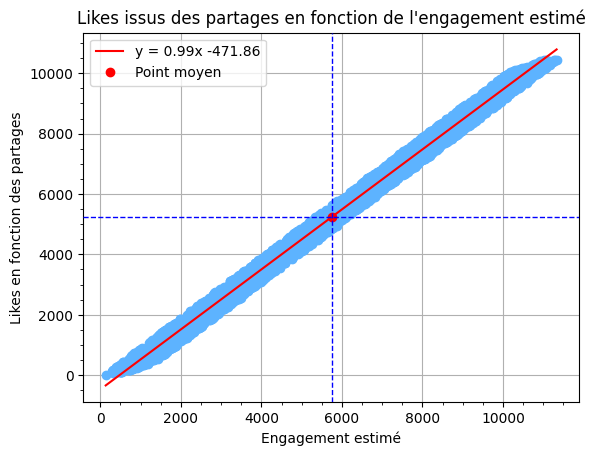

In [3]:
from matplotlib.pyplot import *
from pandas import *
from statistics import *
from numpy import *

# Lecture du fichier excel
df = read_excel("dataS204.xlsx")

# tableau contenant les engagements estimes
engagement = [e for e in df['Engagement estimé']]

#tableau contenant les likes en fonction des partages
col = "Likes en fonction des partages"
y = [e for e in df[col]]

# initialisation d'un dictionnaire ayant comme cles les ages et comme valeurs la somme des likes en fonctions des partages associes
d = {}
for i in range(len(y)):
    if engagement[i] not in d:
        d[engagement[i]] = y[i]
    else:
        d[engagement[i]] += y[i]

# tri du dictionnaire pour arranger les cles par ordre croissant
d = dict(sorted(d.items()))

# donnees pour le nuage de points
x = list(d)
y = list(d.values())

# calculs de la droite de regression
a = cov(x, y)[0,1]/variance(x)
b = mean(y) - a*mean(x)


# creation du nuage de points et de le droite de regression
scatter(x, y, color="#5db3ff", zorder=2)
plot(x, [a*i + b for i in x], color='red', label=f"y = {a:.2f}x {b:.2f}", zorder=3)

# moyennes des deux series de donnees
moyenne_x = round(mean(x), 2)
moyenne_y = round(mean(y), 2)

# Ajout du point moyen
plot(moyenne_x, moyenne_y, 'ro', label="Point moyen", zorder=3)

# Ajout des droites passant par le point moyen
axvline(moyenne_x, color='blue', linestyle='--', linewidth=1, zorder=3)
axhline(moyenne_y, color='blue', linestyle='--', linewidth=1, zorder=3)

# creation des legendes et du titre
title("Likes issus des partages en fonction de l'engagement estimé")
xlabel("Engagement estimé")
ylabel(col) 


# calcul de la covariance
covariance = cov(x, y)[0,1]

# calcul du coefficient de pearson
coef = corrcoef(x, y)[0,1]

print("moyenne d'engagement estimés =", moyenne_x)
print("moyenne de likes en fonction des partages =", moyenne_y)
print("covariance =", round(covariance,2))
print("coef de pearson =", round(coef,2))

#parametres de la grille
minorticks_on()
grid(True)

# affichage
legend()
show()

## Script python pour le peuplement des tables

In [ ]:
from pandas import *
from random import *

#Precision: Comme il s'agit d'un jeu d'essai, tous les groupes, pages... n'ont pas été crée. 
#Seuls quelques lignes de données ont été utilisées afin de limiter la taille du fichier sql généré.

#Lecture du fichier excel
df = read_excel("dataS204.xlsx")

colonnes = df.columns
nbUser = 200  #200 premiers utilisateurs

#Création d'un dictionnaire comprenant l'entierete des donnees liees a un user
d = {}
for i in range(nbUser):
    d[i] = {} 
    d[i]['genre'] = df[' F (Sexe) '][i]
    d[i]['username'] = "user" + str(i+1)
    d[i]['date_de_naissance'] = str(2025 - int(df[' G (Âge) '][i])) + "-" + str(randint(1, 12)) + "-" + str(randint(1, 28))
    d[i]['niveau_d_education'] = df[" I (Niveau d'éducation) "][i]
    d[i]['type_d_abonnement'] = df[" J (Type d'abonnement) "][i]

#création d'un fichier "PeuplementBD.sql" dans lequel les requetes seront ecrites
f = open("PeuplementBD.sql", 'w')

#creation des requetes pour la table utilisateur
for i in range(nbUser):
    s = "INSERT INTO utilisateur VALUES(DEFAULT, '"+str(d[i]['genre'])+"',"+"'"+str(d[i]['username'])+"',"+str(d[i]['date_de_naissance'])+","+"'"+str(d[i]['niveau_d_education'])+"',"+ "'"   + str(d[i]['type_d_abonnement'])    + "'); \n"
    f.write(s)

#initialisation du nombre de pages a creer
nbP = 0  
for i in range(nbUser):
    nbP += int(df[" AJ (Créations de pages) "][i])
print("nb de pages à créer: ", nbP)

#creation des requetes pour la table page
for i in range(nbP):
    s = "INSERT INTO page(Id_page) VALUES(DEFAULT); \n"
    f.write(s)

#creation des requetes pour la table administre
p = 0 #compteur qui permet de ne pas creer deux pages avec le meme id (eviter donc les erreurs d'insertion)
for i in range(nbUser):
    for j in range (int(df[" AJ (Créations de pages) "][i])):
        s = "INSERT INTO administre VALUES("+str(i)+","+str(p)+");\n"
        p += 1
        f.write(s)

#initialisation du nombre de groupes a creer
nbG = 0  
for i in range(nbUser):
    nbG += int(df[" V (Créations de groupes) "][i]) 
print("nb de groupes à créer: ", nbG)

#creation des requetes pour la table groupe
for i in range(nbG):
    s = "INSERT INTO groupe VALUES("+str(randint(1, 200))+", DEFAULT); \n" #attribue une page aléatoire parmi celles creees
    f.write(s)


#creation des requetes pour la table notification
for i in range(nbUser):
    for j in range (int(df[" L (Notifications) "][i])):
        s = "INSERT INTO Notification(Id_utilisateur, Id_Notification) VALUES("+str(i)+", DEFAULT);\n"
        p += 1
        f.write(s)

#creation des requetes pour la table message
for i in range(nbUser):
    for j in range(int(df[" K (Messages privés) "][i])):
        s = "INSERT INTO message(Id_utilisateur, Id_utilisateur_1) VALUES("+str(i)+","+str(randint(1, 200))+");\n"
        f.write(s)

#creation des requetes pour la table publication
for i in range(nbUser):
    for j in range(int(df[" M (Publications) "][i])):
        s = "INSERT INTO publication(Id_page, Id_utilisateur, Id_publication) VALUES("+str(randint(1, 200))+","+str(i)+",DEFAULT);\n"
        f.write(s)

#creation des requetes pour la table reaction
#commentaires
for i in range(nbUser):
    for j in range(int(df[' C (Commentaires) '][i])):
        s = "INSERT INTO reaction(Id_page, Id_utilisateur, Id_publication, Id_utilisateur_1, Id_reaction, type) VALUES("+ \
            str(randint(1, 200))+","+str(randint(1, nbUser-1))+","+str(randint(1,200))+","+str(i)+",DEFAULT,'commentaire');\n"
        f.write(s)

#likes
for i in range(nbUser):
    for j in range(int(df[' A (Likes) '][i])):
        s = "INSERT INTO reaction(Id_page, Id_utilisateur, Id_publication, Id_utilisateur_1, Id_reaction, type) VALUES("+ \
            str(randint(1, 200))+","+str(randint(1, nbUser-1))+","+str(randint(1,200))+","+str(i)+",DEFAULT,'like');\n"
        f.write(s)

#partage
for i in range(nbUser):
    for j in range(int(df[' B (Partages) '][i])):
        s = "INSERT INTO reaction(Id_page, Id_utilisateur, Id_publication, Id_utilisateur_1, Id_reaction, type) VALUES("+ \
            str(randint(1, 200))+","+str(randint(1, nbUser-1))+","+str(randint(1,200))+","+str(i)+",DEFAULT,'partage');\n"
        f.write(s)

#participation evenement
for i in range(nbUser):
    for j in range(int(df[' U (Participations événements) '][i])):
        s = "INSERT INTO reaction(Id_page, Id_utilisateur, Id_publication, Id_utilisateur_1, Id_reaction, type) VALUES("+ \
            str(randint(1, 200))+","+str(randint(1, nbUser-1))+","+str(randint(1,200))+","+str(i)+",DEFAULT,'participation evenement');\n"
        f.write(s)


#creation des requetes pour la table page
#il n'y a pas de nombre de pubs precis, on part donc sur une base de 100
for i in range(100):
    s = "INSERT INTO pub(Id_pub) VALUES(DEFAULT); \n"
    f.write(s)

#creation des requetes pour la table Session
for i in range(nbUser):
    s = "INSERT INTO Session VALUES(DEFAULT,"+"'2025-"+str(randint(1, 4))+"-"+str(randint(1,28))+"','2025-"+str(randint(5, 9))+"-"+str(randint(1,30))+\
        ","+df[' H (Localisation) '][randint(0, 10)]+","+str(i)+"); \n"
    f.write(s)

#creation des requetes pour la table Accede_a
for i in range(nbUser):
    s = "INSERT INTO Accede_a VALUES("+str(randint(1, 100))+","+str(randint(1,nbP))+"); \n"
    f.write(s)

#creation des requetes pour la table Reponse_a
for i in range(nbUser):
    s = "INSERT INTO Reponse_a VALUES("+str(randint(1,nbP))+","+str(randint(1,nbUser))+str(randint(1,300))+","+str(randint(1,nbP))+\
        str(randint(1,nbUser))+","+str(randint(1,300))+"); \n"
    f.write(s)

#creation des requetes pour la table rejoint
for i in range(nbUser):
    g = 0 #compteur qui permet qu'un user ne rejoigne pas deux fois le meme groupe(eviter donc les erreurs d'insertion)
    for j in range (int(df[" W (Membres dans groupes) "][i])):
        s = "INSERT INTO rejoint VALUES("+str(randint(1,nbUser))+","+str(randint(1,nbP))+str(g)+"); \n"
        g += 1
        f.write(s)

#creation des requetes pour la table clique
for i in range(nbUser):
    for j in range (int(df[" P (Clics publicités) "][i])):
        s = "INSERT INTO clique VALUES("+str(randint(1,200))+","+str(randint(1,100))+str(g)+"); \n"
        g += 1
        f.write(s)

f.close()